In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
job_skills = pd.read_csv('job_skills.csv')
linkedin_job_posting = pd.read_csv('linkedin_job_postings.csv')

Combining two DataFrames: **linkedin_job_posting** and **job_skills**.

**Parameters:**

**on='job_link'**: This specifies that the merge should be performed based on the ‘job_link’ column. In other words, rows with the same ‘job_link’ in both DataFrames will be merged together.

**how='inner'**: This is the type of merge to be performed. ‘inner’ means that only the rows with matching ‘job_link’ in both DataFrames will be kept in the resulting DataFrame. This is also known as an inner join.

Performing this merge is to enrich the **linkedin_job_posting** DataFrame with additional information from the **job_skills** DataFrame. B

In [ ]:
linkedin_job_posting = pd.merge(linkedin_job_posting, job_skills, on='job_link', how = 'inner')

Given code cleans the **linkedin_job_posting** DataFrame by removing rows with missing values. This is a common preprocessing step in data analysis and machine learning because many algorithms do not handle missing values well.

In [ ]:
print(linkedin_job_posting.shape)
print('\n')
print(linkedin_job_posting.isna().sum())
print('\n')
linkedin_job_posting = linkedin_job_posting.dropna()
print(linkedin_job_posting.isna().sum())
print('\n')
print(linkedin_job_posting.shape)

(1296381, 15)


job_link                  0
last_processed_time       0
got_summary               0
got_ner                   0
is_being_worked           0
job_title                 0
company                   9
job_location             19
first_seen                0
search_city               0
search_country            0
search_position           0
job_level                 0
job_type                  0
job_skills             2035
dtype: int64


job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
job_skills             0
dtype: int64


(1294318, 15)


The reason for performing these operations is to clean and standardize the text data in the **linkedin_job_posting** DataFrame. By converting all text to lowercase and replacing certain strings, it makes the data more consistent and easier to analyze or process in later steps.

In [ ]:
linkedin_job_posting = linkedin_job_posting.applymap(lambda s:s.lower() if type(s) == str else s)
linkedin_job_posting = linkedin_job_posting.replace({' & ': ' and '}, regex=True)

**Checking the head of the dataframe.**

In [ ]:
linkedin_job_posting.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"medical equipment sales, key competitors, term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"nursing, bachelor of science in nursing, maste..."
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,restaurant supervisor - the forklift,wasatch adaptive sports,"sandy, ut",2024-01-14,tooele,united states,stand-in,mid senior,onsite,"restaurant operations management, inventory ma..."
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,independent real estate agent,howard hanna | rand realty,"englewood cliffs, nj",2024-01-16,pinehurst,united states,real-estate clerk,mid senior,onsite,"real estate, customer service, sales, negotiat..."
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,registered nurse (rn),trinity health mi,"muskegon, mi",2024-01-14,muskegon,united states,nurse practitioner,mid senior,onsite,"nursing, bsn, medical license, virtual rn, nur..."


Breaking down the ‘job_skills’ text into individual skills and then counting these skills to find out how many skills are needed for a particular **job_title**.

In [ ]:
#defining function to iterate skills into list of skills and also removing 2 letter words like: is, it, am
def itr_skills(row):

    skills = row['job_skills'].split(', ')
    skills = [skills for skills in skills if len(skills) >= 3]

    return skills

linkedin_job_posting['skills'] = linkedin_job_posting.apply(itr_skills, axis=1)# applying function

linkedin_job_posting['skills_count'] = linkedin_job_posting['skills'].apply(len)

linkedin_job_posting.head(2)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills,skills_count
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"medical equipment sales, key competitors, term...","[medical equipment sales, key competitors, ter...",25
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"nursing, bachelor of science in nursing, maste...","[nursing, bachelor of science in nursing, mast...",17


In [ ]:
linkedin_job_posting.drop(['job_skills'], axis=1, inplace=True)
linkedin_job_posting = linkedin_job_posting.rename(columns={'skills': 'job_skills'})

By dropping the original **‘job_skills’** column and renaming the new **‘skills’** column to ***‘job_skills’***, it ensures that the DataFrame has a clean and correctly named ‘job_skills’ column for further analysis.

In [ ]:
linkedin_job_posting['search_country'] = linkedin_job_posting['search_country'].astype('category')
linkedin_job_posting['search_country'].cat.categories

Index(['australia', 'canada', 'united kingdom', 'united states'], dtype='object')

These steps are to make the dataFrame work faster and use less memory by changing the **‘search_country’** column into categories. By looking at the categories in the **‘search_country’** column, we can see all the different countries in the job postings data.

# Job Demand In Different Countries

Analysing data for job demand in different countries.

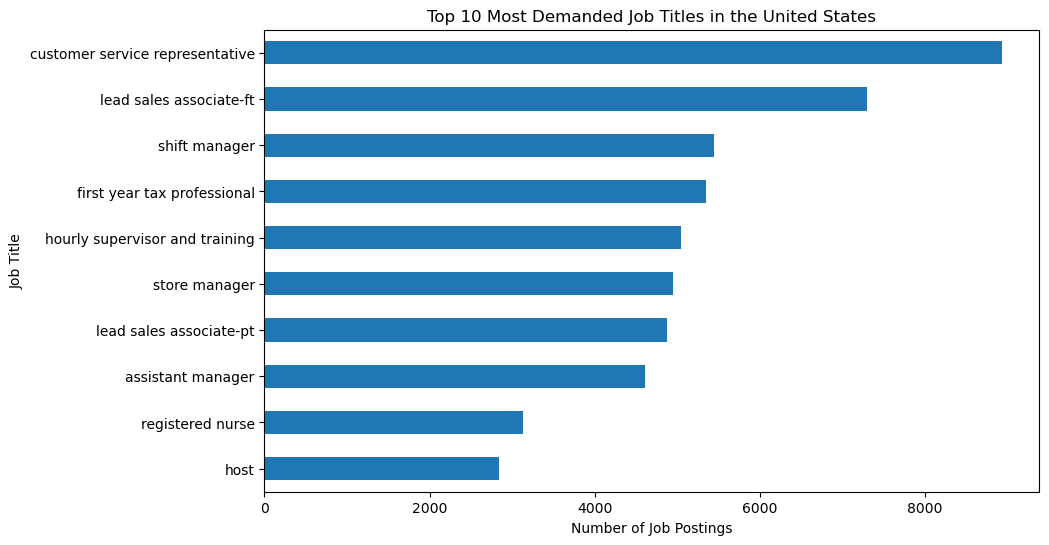

In [ ]:
us_jobs = linkedin_job_posting[linkedin_job_posting['search_country'] == 'united states'] #filtering the linkedin_job_posting DataFrame where the ‘search_country’ column is ‘united states’.
job_counts = us_jobs['job_title'].value_counts() #count of each unique job title in the us_jobs DataFrame.
top_10_us_jobs = job_counts.head(10) # new data frame, contains top 10 job titles in US

import matplotlib.pyplot as plt
import seaborn as sns

#creating a horizontal bar graph
top_10_us_jobs.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Demanded Job Titles in the United States')
plt.gca().invert_yaxis()
plt.show()

* The length of each bar corresponds to the number of job postings for each listed job title, indicating the level of demand for that role. The longer the bar, the higher the demand for that job title. The **“Customer Service Representative”** role has the longest bar, indicating it is the most demanded job in **US.**

**In the same manner, you can view the top 10 in-demand jobs in the UK, Australia, and Canada.**

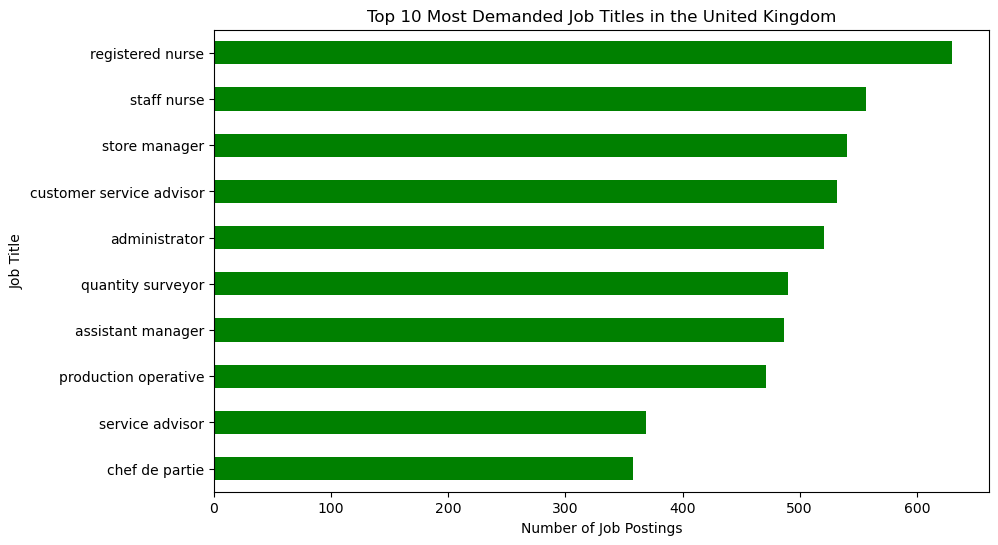

In [ ]:
uk_jobs = linkedin_job_posting[linkedin_job_posting['search_country'] == 'united kingdom']
job_counts2 = uk_jobs['job_title'].value_counts()
top_10_uk_jobs = job_counts2.head(10)

top_10_uk_jobs.plot(kind='barh', figsize=(10, 6), color='green')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Demanded Job Titles in the United Kingdom')
plt.gca().invert_yaxis()
plt.show()

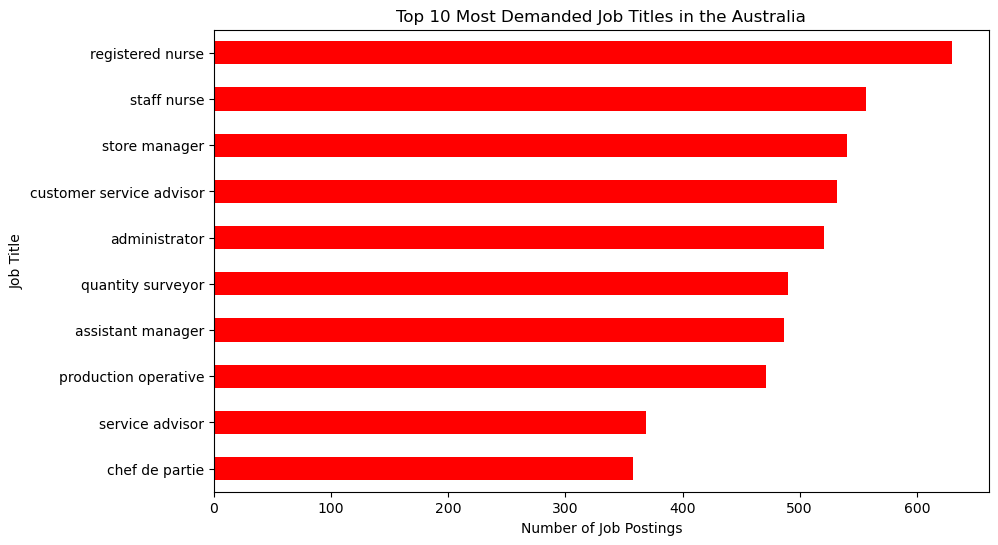

In [ ]:
aus_jobs = linkedin_job_posting[linkedin_job_posting['search_country'] == 'australia']
job_counts3 = uk_jobs['job_title'].value_counts()
top_10_aus_jobs = job_counts3.head(10)

top_10_aus_jobs.plot(kind='barh', figsize=(10, 6), color='red')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Demanded Job Titles in the Australia')
plt.gca().invert_yaxis()
plt.show()

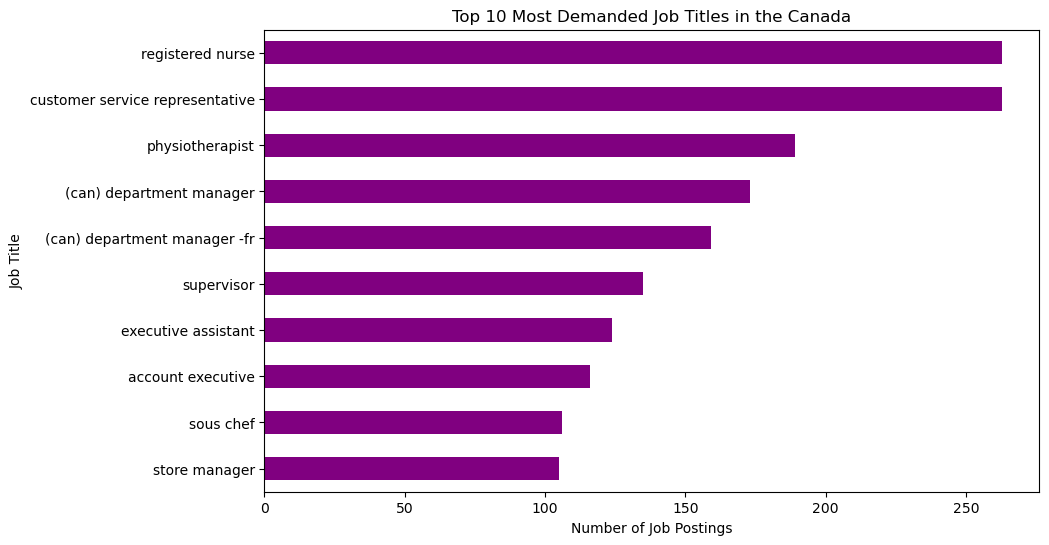

In [ ]:
canada_jobs = linkedin_job_posting[linkedin_job_posting['search_country'] == 'canada']
job_counts4 = canada_jobs['job_title'].value_counts()
top_10_canada_jobs = job_counts4.head(10)

top_10_canada_jobs.plot(kind='barh', figsize=(10, 6), color='purple')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.title('Top 10 Most Demanded Job Titles in the Canada')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
linkedin_job_posting.head(2)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"[medical equipment sales, key competitors, ter...",25
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"[nursing, bachelor of science in nursing, mast...",17


In [ ]:
print(linkedin_job_posting['first_seen'].dtype)
print(linkedin_job_posting['last_processed_time'].dtype)

object
object


The columns **‘first_seen’** and **‘last_processed_time’** are currently of the object data type, and we need to transform them into the **datetime format**. However, it’s important to note that the **‘first_seen’** column **doesn’t contain timestamp data**, unlike the **‘last_processed_time’** column.

Therefore, before we can convert the **‘last_processed_time’** column into datetime format, we must first change it into a **string** and **eliminate the timestamp** data. This step is crucial for the successful conversion into **datetime format**.

In [ ]:

linkedin_job_posting['first_seen'] = pd.to_datetime(linkedin_job_posting['first_seen'])
linkedin_job_posting['first_seen_date'] = linkedin_job_posting['first_seen'].dt.date
# Convert to string
linkedin_job_posting['last_processed_time'] = linkedin_job_posting['last_processed_time'].astype(str)
# Remove time data
linkedin_job_posting['last_processed_time'] = linkedin_job_posting['last_processed_time'].str.split(' ').str[0]
linkedin_job_posting['last_processed_time'] = pd.to_datetime(linkedin_job_posting['last_processed_time'])
linkedin_job_posting['process_duration'] = (linkedin_job_posting['last_processed_time'] - linkedin_job_posting['first_seen']).dt.days

The execution of the aforementioned code aims to extract valuable insights from the **‘first_seen’ and ‘last_processed_time’** columns in the LinkedIn job posting DataFrame. The calculation of **‘process_duration’** **provides insight into the duration required to process each job posting.**

# Job Market Trend & Processing time

By creating a **line plot** of the number of job postings for **first_seen**, it **provides a visual representation of the job market trends.**

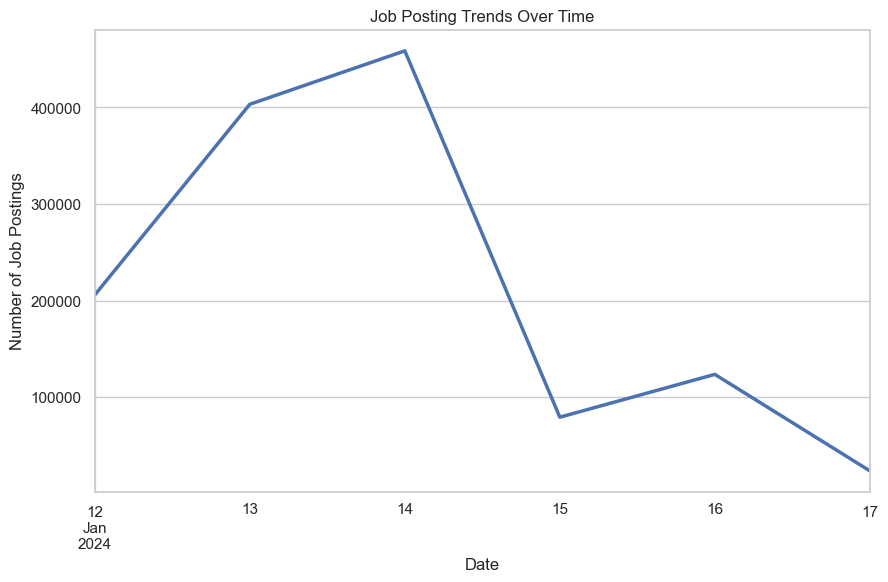

In [ ]:
sns.set(style="whitegrid")

# Job Posting Trends
plt.figure(figsize=(10, 6))
linkedin_job_posting['first_seen'].value_counts().sort_index().plot(kind='line', linewidth=2.5)
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()

In [ ]:
import calendar

print(calendar.month(2024, 1))

    January 2024
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31



* The graph displays the number of job postings over a six-day period from **January 12, 2024** to **January 17, 2024**.

* Here’s a detailed explanation:

1. The graph starts on **January 12**, with a relatively low number of job postings.

2. There is a significant increase in job postings in the following days, reaching its peak on **January 14** with approximately **400,000** postings. This indicates that most of the jobs were posted on **weekend days. (january,13- Saturday & january, 14-Sunday)**

3. After reaching this peak, there is a sharp decline in the number of job postings. By **January 17**, the number of job postings drops to around **50,000**. This sharp decline could be due to a variety of factors such as the end of a job posting cycle or a decrease in job availability.


* This trend suggests that job seekers would have the most opportunities if they were to search for jobs around **January 14**. However, it’s important to note that these trends can vary and may not be the same in the future.

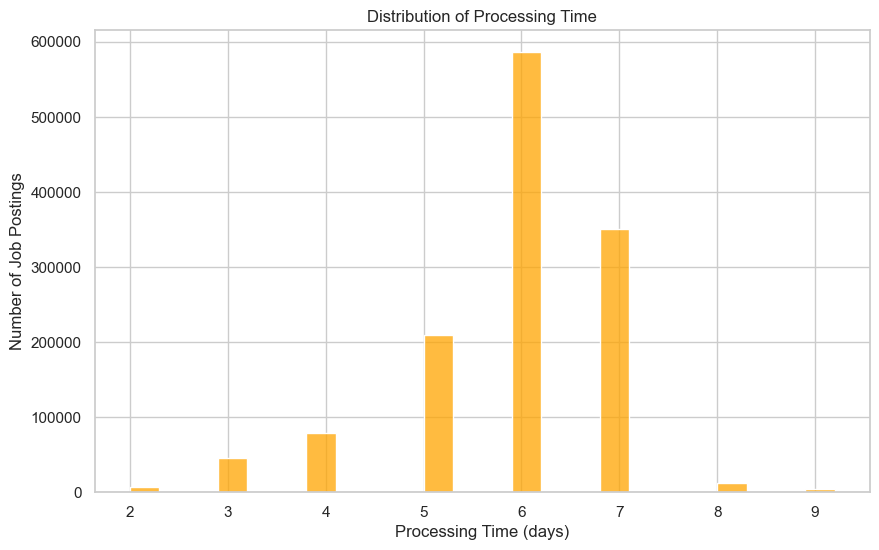

In [ ]:
# Processing Time
plt.figure(figsize=(10, 6))
sns.histplot(data=linkedin_job_posting, x='process_duration', binwidth=0.3, color = 'orange')
plt.title('Distribution of Processing Time')
plt.xlabel('Processing Time (days)')
plt.ylabel('Number of Job Postings')
plt.show()

* The provided chart is a bar graph that represents the distribution of processing time for job postings. Here are some insights based on the chart:

1. The chart shows the number of job postings processed within a specific number of days. The x-axis represents the **“Processing Time (days)”, ranging from 2 to 9 days**, while the y-axis represents the **“Number of Job Postings”, reaching up to 600,000.**

2. There are six bars representing data for processing times of jobs on different days. The bars for **day 6** & **day 8** have significantly higher values than others, with **day six being the highest with over half a million job postings processed.** This suggests that the sixth and eighth days were the most active in terms of job posting processing.

3. **Days 2 through 5 and days 8 & 9 have very low values** comparatively. This indicates that **fewer job postings were processed on these days.**

4. The chart shows a general trend of fluctuating processing times, with some days being more active than others. This could be due to various factors such as the volume of job postings received, the efficiency of the processing system, or the availability of resources on specific days.

* In conclusion, this chart provides valuable insights into the distribution of processing times for job postings. It can help in understanding the efficiency of the job posting process and identifying potential areas for improvement. For instance, strategies could be developed to evenly distribute the processing load across all days to avoid significant fluctuations.

# Distribution of Job Levels in LinkedIn Postings

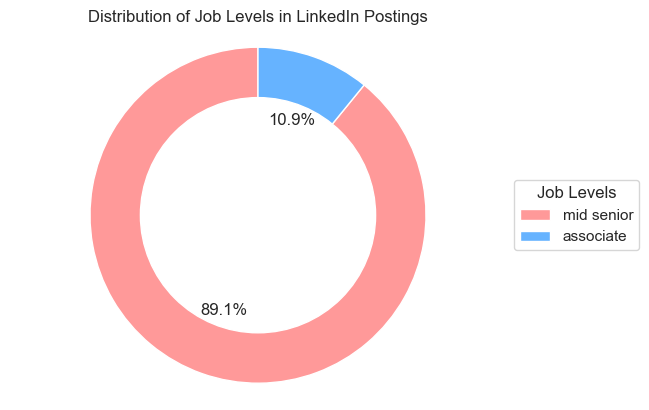

In [ ]:
counts = linkedin_job_posting['job_level'].value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.legend(wedges, counts.index,
          title="Job Levels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Job Levels in LinkedIn Postings')
plt.show()

1. The chart shows two job levels: mid-senior and associate. The **mid-senior level** jobs are depicted in pink and **constitute the majority at 89.1%**. On the other hand, **associate level** jobs are depicted in blue and **make up 10.9% of the total.**

2. This distribution indicates a **higher demand or availability of mid-senior level jobs compared to associate level jobs on LinkedIn.** It suggests that LinkedIn is a platform where more experienced professionals are likely to find opportunities that match their skill level.

3. However, the relatively smaller percentage of **associate level jobs** does not necessarily mean that there are fewer opportunities for less experienced professionals. It could also indicate that such jobs **are not posted as frequently or that they get filled more quickly.**

* In conclusion, this chart provides valuable insights into the job market dynamics on LinkedIn, particularly regarding the distribution of job levels. It can be useful for job seekers to understand where they might have the best chances of finding job postings that match their level of experience.

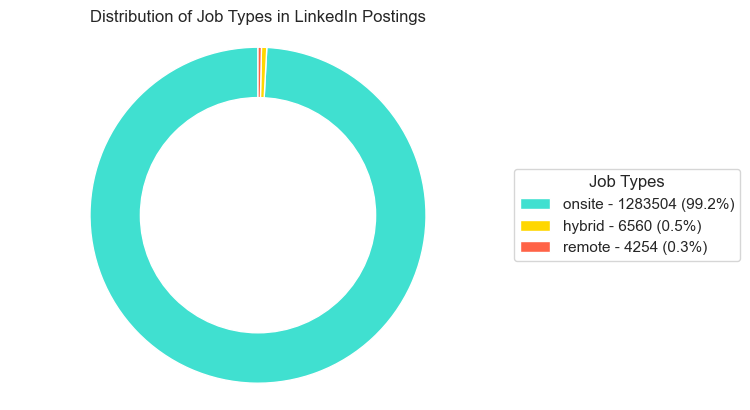

In [ ]:
counts2 = linkedin_job_posting['job_type'].value_counts()


fig, ax = plt.subplots()
wedges, _ = ax.pie(counts2, startangle=90, colors=['#40E0D0','#FFD700','#FF6347'])


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')


labels = [f'{i} - {j} ({j/counts2.sum()*100:.1f}%)' for i,j in zip(counts2.index, counts2)]
plt.legend(wedges, labels,
          title="Job Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribution of Job Types in LinkedIn Postings")
plt.show()

1. The chart shows three job types: onsite, hybrid, and remote. The **onsite jobs** are depicted in cyan and constitute the majority at **99.2%.** **Hybrid jobs** are depicted in golden and make up **0.5%** of the total, while **remote jobs** are depicted in red and account for **0.3%.**

2. This distribution indicates a **significant dominance of onsite job postings on LinkedIn**, suggesting that companies might still be largely favoring **traditional in-office work settings.**

3. Hybrid and remote job opportunities constitute a minimal portion of the total job postings, indicating limited availability or preference for these types of working arrangements.

* In conclusion, this chart provides valuable insights into the job market dynamics on LinkedIn, particularly regarding the distribution of job types. It **can be useful for job seekers to understand where they might have the best chances of finding job postings that match their preferred work arrangement.**

# most most sought-after skills in different jobs

By finding the **most common skill for each job title**, you can get an idea of **what skills are most in demand for each type of job**. This can be useful for job seekers, recruiters, or anyone doing labor market research.

In [ ]:
df = linkedin_job_posting

from collections import Counter

grouped_skills = df.groupby('job_title')['job_skills'].sum()

most_common_skills = grouped_skills.apply(lambda x: Counter(x).most_common(1))

data = []

for position, skills in most_common_skills.items():
    if skills:
        data.append([position, skills[0][0], skills[0][1]])

df_most_common_skills = pd.DataFrame(data, columns=['job_title', 'Most Common Skill', 'Occurrences'])



Given below dataframe contains **most common skill for each job_title.**

In [ ]:
df_most_common_skills.sort_values(by = 'Occurrences', ascending = False).head(10)

,job_title,Most Common Skill,Occurrences
116170,customer service representative,customer service,8873
229090,lead sales associate-ft,customer service,7015
163226,first year tax professional,customer service,4788
229091,lead sales associate-pt,customer service,4655
491745,store manager,customer service,4505
197225,hourly supervisor and training,inventory management,4468
463984,shift manager,training,4444
33974,assistant manager,customer service,3713
522040,travel allied health professional - ct technol...,ct technologist,2570
360218,registered nurse,nursing,2311


# Top 15 Required Skills in Linkedin

In [ ]:
job_skills = job_skills.dropna()

skills = ''
for skill in job_skills.job_skills:
    skills += skill.lower()

skills = skills.split(', ')
skills[:10], len(skills)

In [ ]:
from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills

In [ ]:
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 5000
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='red')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 15 Required Skills in LinkedIn', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 400_000)
plt.show()

1. **Communication:** This is the most required skill with a frequency of 352,814.
2. **Teamwork:** This skill comes second with a frequency of 218,291.
3. **Customer Service:** This is the third most required skill with a frequency of 193,452.
4. **Data Analysis:** Among the top 15, this is the least required skill with a frequency of 77,863.

* Other skills listed in the chart include Leadership, Problem Solving, Time Management, Attention to Detail, Project Management, Interpersonal Skills, Patient Care, Collaboration, and Training.

> **Insights**:

* The high frequency of ‘Communication’ and ‘Teamwork’ suggests that employers highly value these soft skills, indicating the importance of effective interaction in the workplace.

* ‘Customer Service’ being the third most required skill could imply a significant number of customer-facing roles.

* Despite the rise of data-driven decision making, ‘Data Analysis’ is the least required among the top 15 skills, suggesting that it might be a specialized skill required for specific roles.

* The presence of ‘Problem Solving’, ‘Leadership’, and ‘Project Management’ among the top skills indicates the demand for individuals who can lead teams and handle complex projects effectively.

* The chart also highlights the importance of ‘Interpersonal Skills’ and ‘Collaboration’, reinforcing the value of teamwork in the professional environment.

* ‘Patient Care’ being in the list might suggest a considerable number of healthcare-related jobs on LinkedIn.

* It’s interesting to note that ‘Problem Solving’ appears twice in the chart (**once as ‘Problem Solving’ and once as ‘Problemsolving’)**, which might be **due to a data entry error or different categorizations of the same skill**. This duplication might affect the accuracy of the chart.

In [ ]:
print(f"You need on average {int(linkedin_job_posting['skills_count'].median())} skills to apply for a job on linked in")

**We can use the filter provided below to sort companies and the count of vacancies for a specific job title.**

In [ ]:

specific_position = 'lead sales associate-pt'


filtered_df = linkedin_job_posting[linkedin_job_posting['job_title'] == specific_position]


grouped_df = filtered_df.groupby(['company','job_title', 'search_city', 'search_country']).size().reset_index(name='vacancies')


search_job = grouped_df.sort_values(by='vacancies', ascending=False)
print((search_job[search_job['vacancies'] > 0]).head(10))